<a href="https://colab.research.google.com/github/VahidNsr/Image_Recognition_Fashion_MNIST/blob/master/Image_Recognition_Case_Study_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Recognition - Case Study: Fashion MNIST**

## **Import Liberaries**

In [ ]:
#Required Libraries
import numpy as np                      #for numerical computation
import pandas as pd                     #for data analysis and data manipulation
import matplotlib.pyplot as plt         #for data visualization
import seaborn as sns                   #for data visualization
import tensorflow as tf                 #for machine learning and deep neural network
from tensorflow import keras

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## Creating Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
y_test_org = y_test
y_train_org = y_train

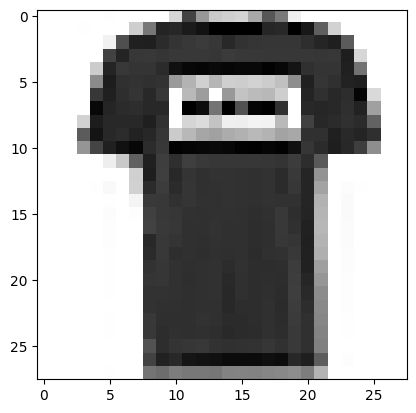

In [ ]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

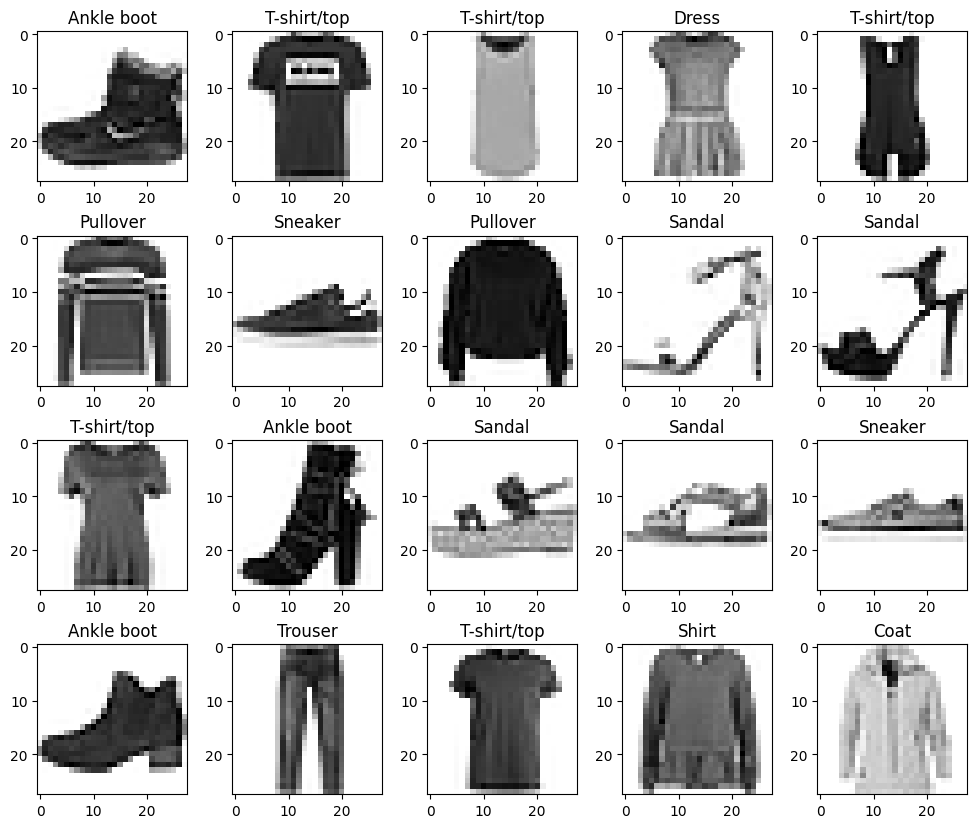

In [ ]:
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(20):
  a = plot.add_subplot(4, 5, i + 1)
  a.imshow(X_train[i], cmap = plt.cm.binary)
  a.title.set_text(class_names[y_train[i]])

##**Data Preparation for ANN**

In [ ]:
X_train_f = X_train.reshape(60000, 28*28)
X_test_f = X_test.reshape(10000, 28*28)

In [ ]:
X_train_f = X_train_f / 255
X_test_f = X_test_f / 255

##**Design Deep Learning Models**

### 1. Simple Neural Network


In [ ]:
model_ANN = keras.models.Sequential()
model_ANN.add(keras.layers.Dense(10, input_dim = 28 * 28, activation = "softmax"))
model_ANN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.001) #learning rate
model_ANN.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the Model
hist_ANN = model_ANN.fit(X_train_f, y_train, epochs = 50, batch_size = 64, validation_split = 0.3, verbose = 1)

Epoch 1/50
657/657 [==============================] - 3s 4ms/step - loss: 0.7160 - accuracy: 0.7620 - val_loss: 0.5517 - val_accuracy: 0.8134
Epoch 2/50
657/657 [==============================] - 2s 3ms/step - loss: 0.5063 - accuracy: 0.8302 - val_loss: 0.4905 - val_accuracy: 0.8292
Epoch 3/50
657/657 [==============================] - 5s 8ms/step - loss: 0.4666 - accuracy: 0.8426 - val_loss: 0.4682 - val_accuracy: 0.8379
Epoch 4/50
657/657 [==============================] - 5s 7ms/step - loss: 0.4467 - accuracy: 0.8491 - val_loss: 0.4509 - val_accuracy: 0.8442
Epoch 5/50
657/657 [==============================] - 4s 6ms/step - loss: 0.4329 - accuracy: 0.8521 - val_loss: 0.4482 - val_accuracy: 0.8492
Epoch 6/50
657/657 [==============================] - 5s 8ms/step - loss: 0.4233 - accuracy: 0.8547 - val_loss: 0.4397 - val_accuracy: 0.8487
Epoch 7/50
657/657 [==============================] - 8s 11ms/step - loss: 0.4170 - accuracy: 0.8556 - val_loss: 0.4264 - val_accuracy: 0.8557
Epoch

Text(0.5, 1.0, 'Base Model: Loss - Epochs')

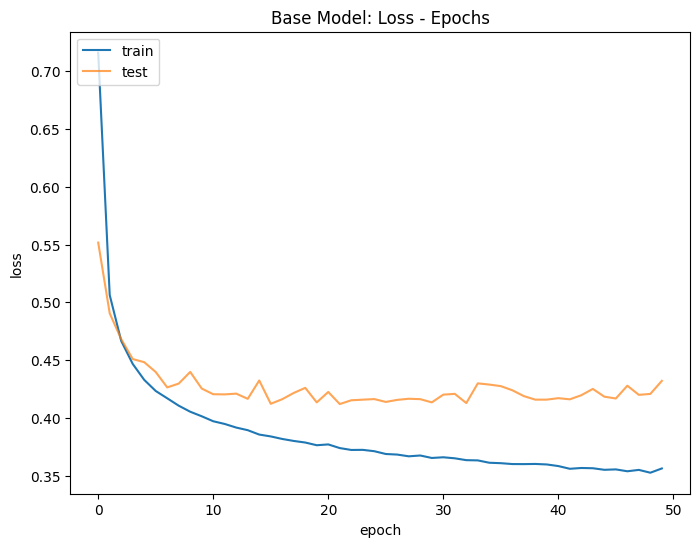

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ANN.history['loss'], label = 'train')
plt.plot(hist_ANN.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Base Model: Loss - Epochs')

Text(0.5, 1.0, 'Base Model: Accuracy - Epochs')

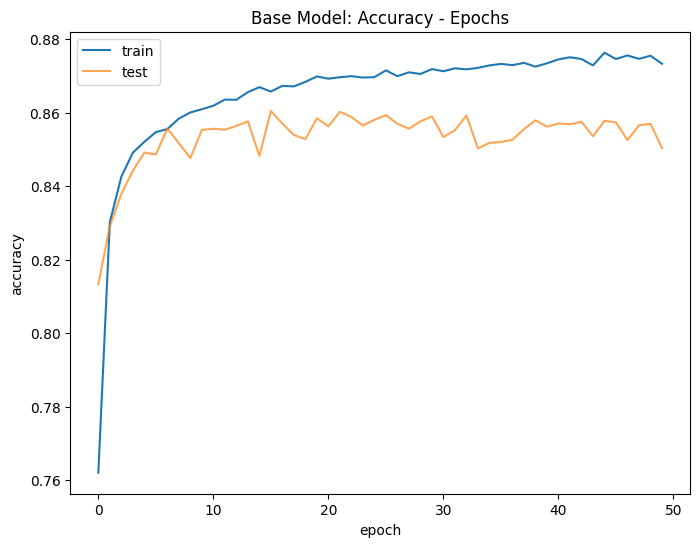

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ANN.history['accuracy'], label = 'train')
plt.plot(hist_ANN.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Base Model: Accuracy - Epochs')

### 2. Deep Neural Network with Single Layer

In [ ]:
model_SL = keras.models.Sequential()
weight_initializer = initializer = tf.keras.initializers.HeNormal()
model_SL.add(keras.layers.Dense(128, input_dim = 28 * 28, activation = "relu", kernel_initializer = weight_initializer))
model_SL.add(keras.layers.Dense(10, activation = "softmax", kernel_initializer = weight_initializer))
model_SL.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.001) #learning rate
model_SL.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist_SL = model_SL.fit(X_train_f, y_train, epochs = 50, batch_size = 64, validation_split = 0.3, verbose = 1)

Epoch 1/50
657/657 [==============================] - 6s 8ms/step - loss: 0.5650 - accuracy: 0.8056 - val_loss: 0.4594 - val_accuracy: 0.8399
Epoch 2/50
657/657 [==============================] - 4s 5ms/step - loss: 0.4120 - accuracy: 0.8547 - val_loss: 0.4027 - val_accuracy: 0.8576
Epoch 3/50
657/657 [==============================] - 4s 6ms/step - loss: 0.3687 - accuracy: 0.8688 - val_loss: 0.4303 - val_accuracy: 0.8466
Epoch 4/50
657/657 [==============================] - 5s 8ms/step - loss: 0.3433 - accuracy: 0.8765 - val_loss: 0.3880 - val_accuracy: 0.8549
Epoch 5/50
657/657 [==============================] - 4s 5ms/step - loss: 0.3197 - accuracy: 0.8850 - val_loss: 0.3468 - val_accuracy: 0.8762
Epoch 6/50
657/657 [==============================] - 4s 5ms/step - loss: 0.3055 - accuracy: 0.8874 - val_loss: 0.3375 - val_accuracy: 0.8761
Epoch 7/50
657/657 [==============================] - 5s 7ms/step - loss: 0.2900 - accuracy: 0.8941 - val_loss: 0.3355 - val_accuracy: 0.8777
Epoch 

Text(0.5, 1.0, '1-Layer Model: Loss - Epochs')

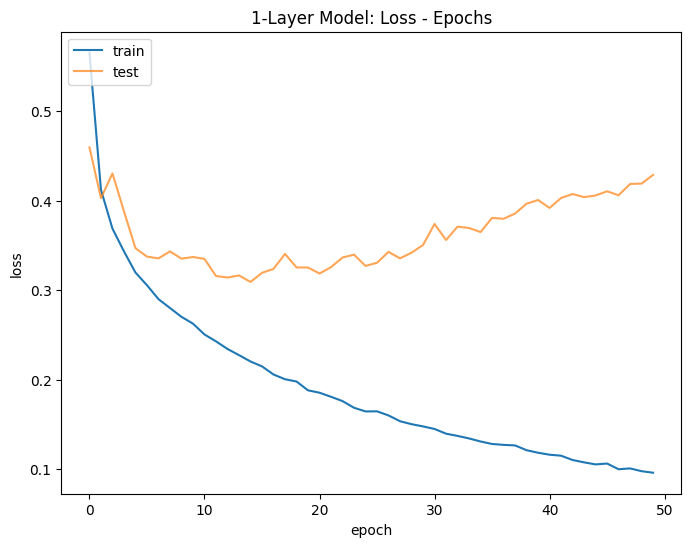

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(hist_SL.history['loss'], label = 'train')
plt.plot(hist_SL.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('1-Layer Model: Loss - Epochs')

Text(0.5, 1.0, '1-Layer: Accuracy - Epochs')

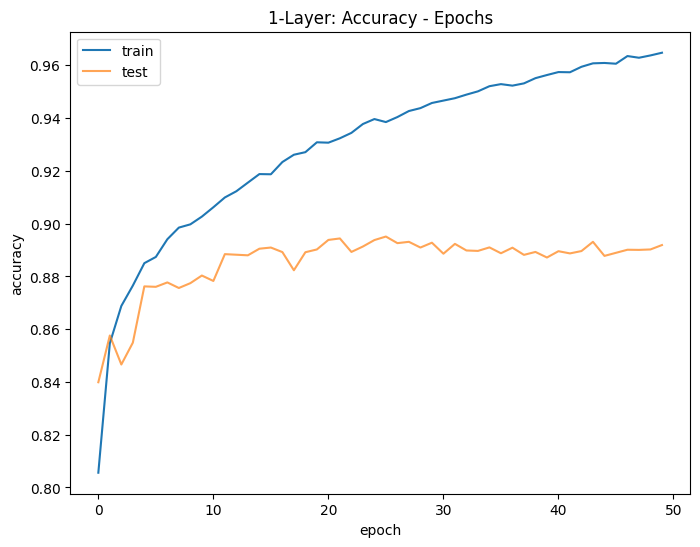

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(hist_SL.history['accuracy'], label = 'train')
plt.plot(hist_SL.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('1-Layer: Accuracy - Epochs')

### 3. Deep Neural Network with Three Layers

In [ ]:
model_ThL = keras.models.Sequential()
weight_initializer = initializer = tf.keras.initializers.HeNormal()
model_ThL.add(keras.layers.Dense(128, input_dim = 28 * 28, activation = "relu", kernel_initializer = weight_initializer))
model_ThL.add(keras.layers.Dense(128, activation = "relu", kernel_initializer = weight_initializer))
model_ThL.add(keras.layers.Dense(128, activation = "relu", kernel_initializer = weight_initializer))
model_ThL.add(keras.layers.Dense(10, activation = "softmax", kernel_initializer = weight_initializer))
model_ThL.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
opt = keras.optimizers.Adam(learning_rate = 0.001) #learning rate
model_ThL.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
hist_ThL = model_ThL.fit(X_train_f, y_train, epochs = 20, batch_size = 64, validation_split = 0.3, verbose = 1)

Epoch 1/20
657/657 [==============================] - 4s 7ms/step - loss: 0.1690 - accuracy: 0.9357 - val_loss: 0.3764 - val_accuracy: 0.8866
Epoch 2/20
657/657 [==============================] - 5s 8ms/step - loss: 0.1611 - accuracy: 0.9382 - val_loss: 0.3708 - val_accuracy: 0.8932
Epoch 3/20
657/657 [==============================] - 4s 7ms/step - loss: 0.1584 - accuracy: 0.9397 - val_loss: 0.3702 - val_accuracy: 0.8921
Epoch 4/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1531 - accuracy: 0.9405 - val_loss: 0.3730 - val_accuracy: 0.8914
Epoch 5/20
657/657 [==============================] - 5s 8ms/step - loss: 0.1466 - accuracy: 0.9435 - val_loss: 0.3882 - val_accuracy: 0.8823
Epoch 6/20
657/657 [==============================] - 5s 7ms/step - loss: 0.1485 - accuracy: 0.9425 - val_loss: 0.4004 - val_accuracy: 0.8853
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.1424 - accuracy: 0.9448 - val_loss: 0.4184 - val_accuracy: 0.8885
Epoch 

Text(0.5, 1.0, '3-Layer Model: Loss - Epochs')

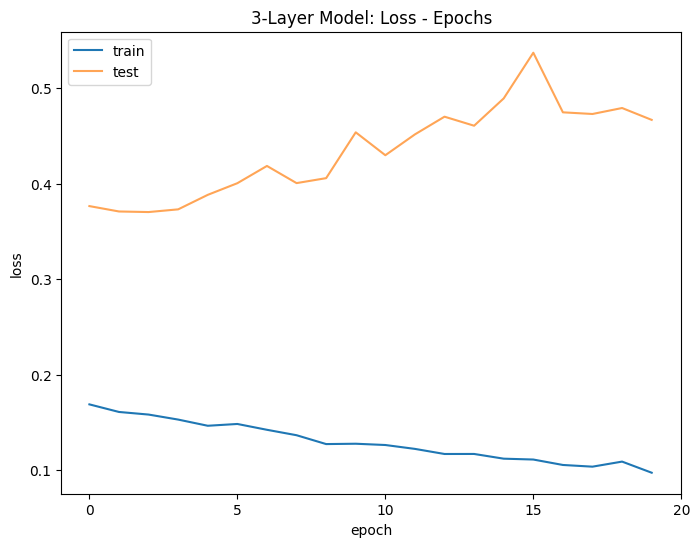

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ThL.history['loss'], label = 'train')
plt.plot(hist_ThL.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 21, 5))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('3-Layer Model: Loss - Epochs')

Text(0.5, 1.0, '3-Layer Model: Accuracy - Epochs')

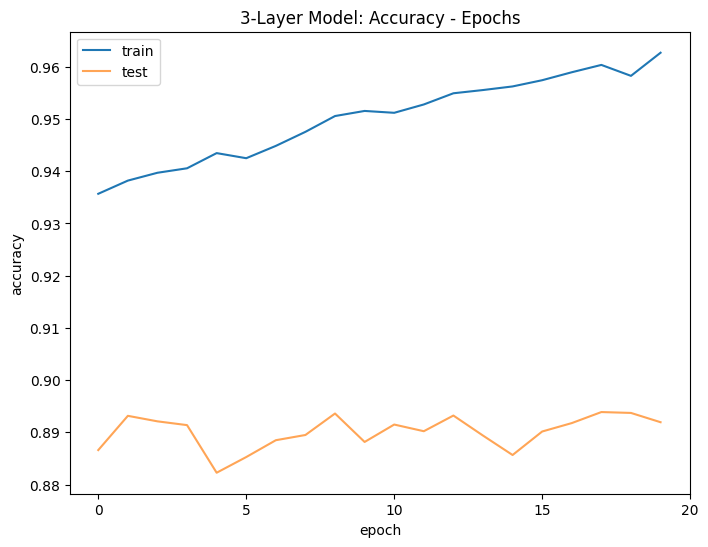

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ThL.history['accuracy'], label = 'train')
plt.plot(hist_ThL.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 21, 5))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('3-Layer Model: Accuracy - Epochs')

### Dropout

In [ ]:
  model_SLR = keras.models.Sequential()
  weight_initializer = initializer = tf.keras.initializers.HeNormal()
  model_SLR.add(keras.layers.Dense(128, input_dim = 28 * 28, activation = "relu", kernel_initializer = weight_initializer))
  model_SLR.add(keras.layers.Dropout(0.1))
  model_SLR.add(keras.layers.Dense(10, activation = "softmax", kernel_initializer = weight_initializer))
  model_SLR.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
hist_SLR = model_SLR.fit(X_train_f, y_train, epochs = 40, batch_size = 32, validation_split = 0.3, verbose = 1)

Epoch 1/40
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2830 - accuracy: 0.8946 - val_loss: 0.3373 - val_accuracy: 0.8825
Epoch 2/40
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2717 - accuracy: 0.8980 - val_loss: 0.3091 - val_accuracy: 0.8900
Epoch 3/40
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2629 - accuracy: 0.8993 - val_loss: 0.3185 - val_accuracy: 0.8868
Epoch 4/40
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2543 - accuracy: 0.9043 - val_loss: 0.3278 - val_accuracy: 0.8835
Epoch 5/40
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2467 - accuracy: 0.9065 - val_loss: 0.3213 - val_accuracy: 0.8829
Epoch 6/40
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2420 - accuracy: 0.9085 - val_loss: 0.3259 - val_accuracy: 0.8874
Epoch 7/40
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2322 - accuracy: 0.9109 - val_loss: 0.3071 - val_accurac

Text(0.5, 1.0, 'Final Model: Loss - Epochs')

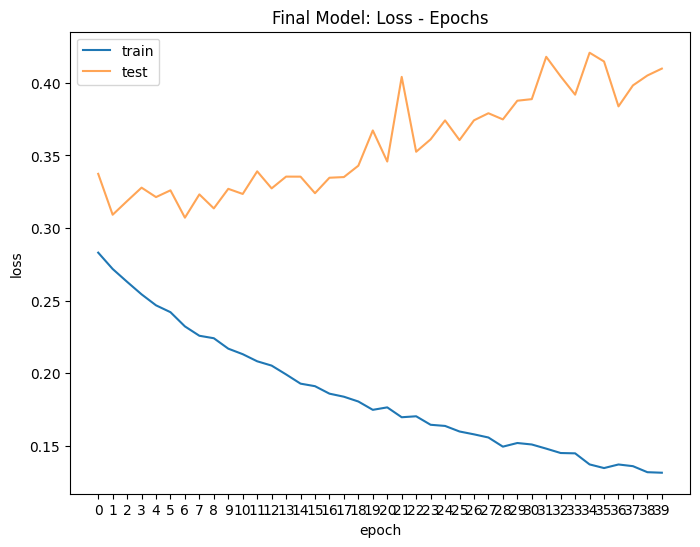

In [ ]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(hist_SLR.history['loss'], label = 'train')
plt.plot(hist_SLR.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 40, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Loss - Epochs')

Text(0.5, 1.0, 'Final Model: Accuracy - Epochs')

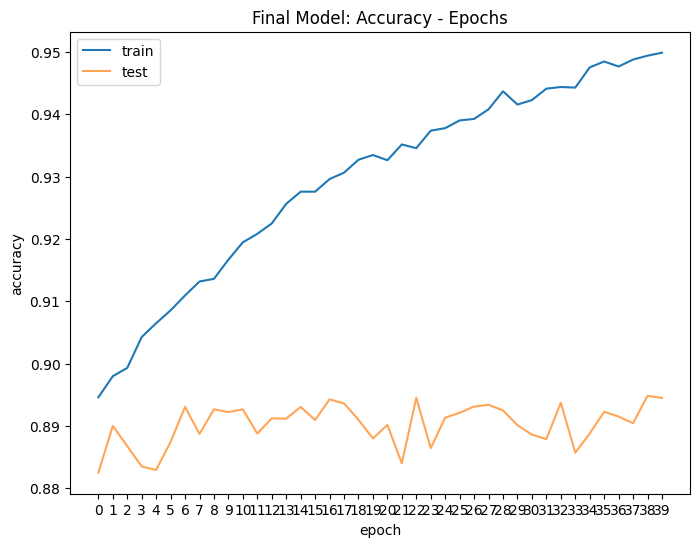

In [ ]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(hist_SLR.history['accuracy'], label = 'train')
plt.plot(hist_SLR.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 40, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Accuracy - Epochs')

In [ ]:
y_pred = model_SLR.predict(X_test_f)

313/313 [==============================] - 2s 6ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

88.32

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
#5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"

array([[844,   2,  17,  22,   6,   1, 101,   0,   7,   0],
       [  2, 973,   1,  16,   5,   0,   3,   0,   0,   0],
       [ 15,   2, 760,   7, 122,   1,  90,   0,   3,   0],
       [ 24,  14,  12, 875,  49,   2,  20,   0,   3,   1],
       [  1,   2,  65,  11, 876,   0,  43,   0,   2,   0],
       [  0,   0,   0,   1,   0, 957,   0,  27,   3,  12],
       [137,   2,  71,  24,  90,   0, 667,   0,   9,   0],
       [  0,   0,   0,   0,   0,   8,   0, 982,   0,  10],
       [  6,   0,   5,   2,   6,   6,   5,   5, 965,   0],
       [  0,   0,   0,   0,   0,  10,   1,  56,   0, 933]])

##**Data Preparation for CNN**

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [ ]:
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
X_train_cnn = X_train_cnn / 255
X_test_cnn = X_test_cnn / 255

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

##**Design CNN Model**

In [ ]:
model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu',
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu',
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu',
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.Dropout(0.25))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model_cnn.add(keras.layers.Dense(10, activation = 'softmax'))
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0

In [ ]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_cnn.fit(X_train_cnn, y_train, epochs = 30, batch_size = 256, validation_split = 0.3)

Epoch 1/50
165/165 [==============================] - 62s 375ms/step - loss: 0.3586 - accuracy: 0.8688 - val_loss: 0.3345 - val_accuracy: 0.8782
Epoch 2/50
165/165 [==============================] - 58s 354ms/step - loss: 0.3267 - accuracy: 0.8802 - val_loss: 0.3197 - val_accuracy: 0.8825
Epoch 3/50
165/165 [==============================] - 59s 357ms/step - loss: 0.3045 - accuracy: 0.8900 - val_loss: 0.3034 - val_accuracy: 0.8882
Epoch 4/50
165/165 [==============================] - 64s 389ms/step - loss: 0.2861 - accuracy: 0.8955 - val_loss: 0.2852 - val_accuracy: 0.8976
Epoch 5/50
165/165 [==============================] - 64s 387ms/step - loss: 0.2716 - accuracy: 0.9005 - val_loss: 0.2866 - val_accuracy: 0.8962
Epoch 6/50
165/165 [==============================] - 64s 386ms/step - loss: 0.2619 - accuracy: 0.9047 - val_loss: 0.2711 - val_accuracy: 0.9037
Epoch 7/50
165/165 [==============================] - 71s 432ms/step - loss: 0.2486 - accuracy: 0.9084 - val_loss: 0.2814 - val_ac

Text(0.5, 1.0, 'CNN Model: Loss - Epochs')

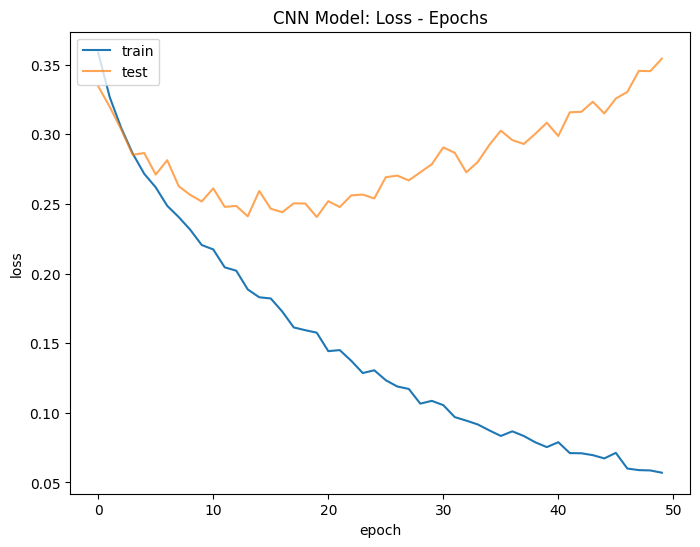

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(model_cnn.history.history['loss'], label = 'train')
plt.plot(model_cnn.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Loss - Epochs')

Text(0.5, 1.0, 'CNN Model: Accuracy - Epochs')

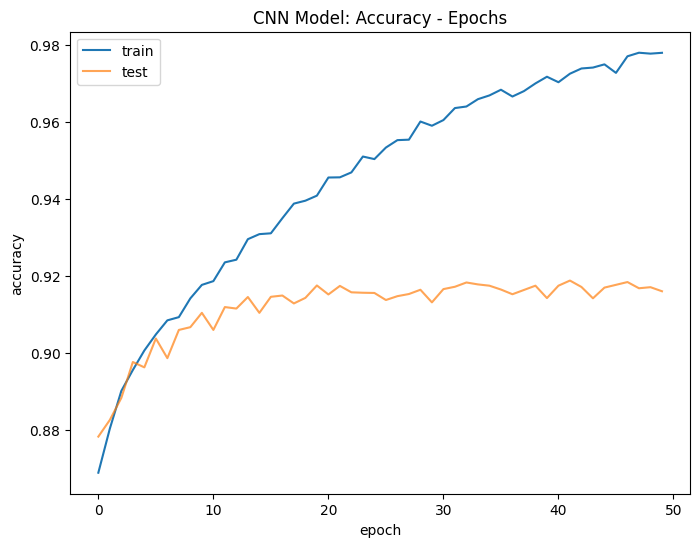

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(model_cnn.history.history['accuracy'], label = 'train')
plt.plot(model_cnn.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Accuracy - Epochs')

In [ ]:
#Define the Model Architecture
model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu',
          kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
model_cnn.add(keras.layers.Dense(10, activation = 'softmax'))
model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                                 
 dense_16 (Dense)            (None, 100)               540900    
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 542230 (2.07 MB)
Trainable params: 542230 (2.07 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
y_pred = model_cnn.predict(X_test_cnn)

313/313 [==============================] - 6s 17ms/step


In [ ]:
T = 0
F = 0

for i in range(y_test.shape[0]):
  if np.argmax(y_test[i]) == np.argmax(y_pred [i]):
      T = T + 1
  else:
      F = F + 1

Accuracy = T / y_test.shape[0]

print(Accuracy)

0.9126
